<a href="https://colab.research.google.com/github/a-apte/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=16.2755340460381, pvalue=0.00029228914500619465)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

In [4]:
import random
random.seed(100) # Same starting point - 2386, comment out to get different values on start
random.randint(0,10000)

2386

## Live Lecture - let's explore some more of scipy.stats

In [5]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

from scipy import stats
b1 = stats.binom(n=100, p=0.6)

print (b1.mean())
print (b1.median())

60.0
60.0


In [6]:
chi2 = stats.chi2(5)

print(chi2.mean())
print(chi2.median())

5.0
4.351460191095526


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

## FUNCTIONS

In [0]:
def standard_error_pooled (col1,col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  se = np.sqrt((var1/len1) + (var2/len2))
  return se

# Source: https://stattrek.com/hypothesis-test/difference-in-means.aspx

In [0]:
def degrees_freedom_pooled (col1, col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  df1 = var1 / len1
  df2 = var2 / len2
  df = ((df1 + df2)**2) / ((df1**2/(len1 - 1)) + (df2**2/(len2 - 1)))
  
  return int(df)
  
  
# Source: https://stattrek.com/hypothesis-test/difference-in-means.aspx

In [0]:
def t_test_2mean(col1, col2, d=0):
  mean1 = col1.mean()
  mean2 = col2.mean()
  t_stat = ((mean1 - mean2) - d) / standard_error_pooled(col1,col2)
  return t_stat
  

In [10]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  return s


'''
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

'''

'\nimport numpy as np\nimport scipy.stats\n\n\ndef mean_confidence_interval(data, confidence=0.95):\n    a = 1.0 * np.array(data)\n    n = len(a)\n    m, se = np.mean(a), scipy.stats.sem(a)\n    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)\n    return m, m-h, m+h\n\n'

## DATA-WRANGLING

In [0]:
import pandas as pd

from scipy import stats

import numpy as np

In [12]:
'''   Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)
'''




url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

headers = ['party', 'hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

df = pd.read_csv(url, names = headers) # Use "names", not "headers"

df.head()

,party,hand_infants,water_project,budget_adoption,freeze_physicians,el_salvador,religion_school,satellite_ban,contras_aid,mx_missile,immigration,synfuels_cutback,education,superfund,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [13]:
'''   Attribute:  #Missing Values:
           1:  0
           2:  0
           3:  12
           4:  48
           5:  11
           6:  11
           7:  15
           8:  11
           9:  14
          10:  15
          11:  22
          12:  7
          13:  21
          14:  31
          15:  25
          16:  17
          17:  28
           '''

df.replace('?', np.nan, inplace = True) # Null values come from replacing ?
df.replace('n', 0, inplace = True)
df.replace('y', 1, inplace = True)

df.isnull().sum()

party                  0
hand_infants          12
water_project         48
budget_adoption       11
freeze_physicians     11
el_salvador           15
religion_school       11
satellite_ban         14
contras_aid           15
mx_missile            22
immigration            7
synfuels_cutback      21
education             31
superfund             25
crime                 17
duty_free             28
south_africa         104
dtype: int64

In [14]:
df.head()

,party,hand_infants,water_project,budget_adoption,freeze_physicians,el_salvador,religion_school,satellite_ban,contras_aid,mx_missile,immigration,synfuels_cutback,education,superfund,crime,duty_free,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [15]:
dem_df = df.loc[df['party'] == 'democrat']
rep_df = df.loc[df['party'] == 'republican']

print(len(dem_df))
print(len(rep_df))
print(len(dem_df)+len(rep_df))
print(len(df))

267
168
435
435


In [16]:
# Uploading data into Pandas

header_new = ['hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

issues = []
t_critical = 1.96
for col in header_new:
  dem_mean = 100*dem_df[col].mean()
  rep_mean = 100*rep_df[col].mean()
  diff = dem_mean - rep_mean
  deg = degrees_freedom_pooled(dem_df[col], rep_df[col])
  tt = t_test_2mean(dem_df[col], rep_df[col])
  pval = 2*(1-stats.t.cdf(np.abs(tt), deg))
  se = 100* standard_error_pooled(dem_df[col], rep_df[col])
  lower_bound = diff - (t_critical*se)
  upper_bound = diff + (t_critical*se)
  issues.append({'0_Issue': col, '1_Dem_mean%': dem_mean, '2_Rep_mean%': rep_mean,
                 '3_Difference%':diff,'4_T-Stat': tt, '4_P-Value': pval, '5_DF': deg,
                '6_LB_95CI': lower_bound, '7_UB_95CI': upper_bound}) # List of dictionaries
  
print("Issues that Democrats favor vs Republicans \n")

df_new = pd.DataFrame(issues)

df_new



Issues that Democrats favor vs Republicans 



,0_Issue,1_Dem_mean%,2_Rep_mean%,3_Difference%,4_P-Value,4_T-Stat,5_DF,6_LB_95CI,7_UB_95CI
0,hand_infants,60.465116,18.787879,41.677237,0.000000e+00,9.789353,408,33.332725,50.021750
1,water_project,50.209205,50.675676,-0.466471,9.247899e-01,-0.094469,354,-10.144569,9.211628
2,budget_adoption,88.846154,13.414634,75.431520,0.000000e+00,23.079484,333,69.025580,81.837459
3,freeze_physicians,5.405405,98.787879,-93.382473,0.000000e+00,-57.477422,410,-96.566848,-90.198099
4,el_salvador,21.568627,95.151515,-73.582888,0.000000e+00,-24.360977,420,-79.503112,-67.662663
5,religion_school,47.674419,89.759036,-42.084618,0.000000e+00,-10.908427,432,-49.646281,-34.522955
6,satellite_ban,77.220077,24.074074,53.146003,0.000000e+00,12.682089,349,44.932359,61.359647
7,contras_aid,82.889734,15.286624,67.603110,0.000000e+00,18.685329,366,60.511873,74.694347
8,mx_missile,75.806452,11.515152,64.291300,0.000000e+00,17.832031,420,57.224750,71.357850
9,immigration,47.148289,55.757576,-8.609287,8.060020e-02,-1.752201,356,-18.239576,1.021003


In [17]:
df_new2 = df_new.sort_values('3_Difference%')

df_new2 = df_new2.reset_index(drop=True)

# df_new2 = df_new2.set_index('0_Issue')

# field = "Day"
# day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# ax = df.set_index("Day").loc[day_order].plot(kind="bar", legend=False)
# ax.set_ylabel("Value")

df_new2

,0_Issue,1_Dem_mean%,2_Rep_mean%,3_Difference%,4_P-Value,4_T-Stat,5_DF,6_LB_95CI,7_UB_95CI
0,freeze_physicians,5.405405,98.787879,-93.382473,0.000000e+00,-57.477422,410,-96.566848,-90.198099
1,el_salvador,21.568627,95.151515,-73.582888,0.000000e+00,-24.360977,420,-79.503112,-67.662663
2,education,14.457831,87.096774,-72.638943,0.000000e+00,-21.529276,367,-79.251907,-66.025979
3,crime,35.019455,98.136646,-63.117191,0.000000e+00,-20.316720,329,-69.206249,-57.028132
4,superfund,28.968254,86.075949,-57.107695,0.000000e+00,-14.786188,416,-64.677671,-49.537720
5,religion_school,47.674419,89.759036,-42.084618,0.000000e+00,-10.908427,432,-49.646281,-34.522955
6,immigration,47.148289,55.757576,-8.609287,8.060020e-02,-1.752201,356,-18.239576,1.021003
7,water_project,50.209205,50.675676,-0.466471,9.247899e-01,-0.094469,354,-10.144569,9.211628
8,south_africa,93.513514,65.753425,27.760089,3.152079e-11,6.988156,224,19.974090,35.546088
9,synfuels_cutback,50.588235,13.207547,37.380688,0.000000e+00,9.268631,430,29.475945,45.285431


## PLOTS

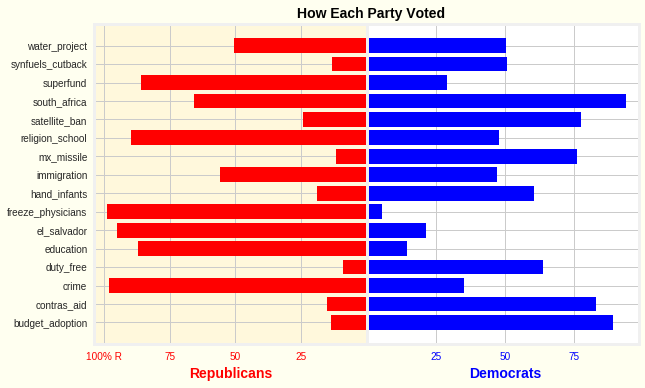

In [18]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("fivethirtyeight") 
plt.figure(figsize=(20,10));

y = df_new['0_Issue']
x1 = df_new['2_Rep_mean%']
x2 = df_new['1_Dem_mean%']

fig, axes = plt.subplots(ncols=2, sharey=True)

fig.set_facecolor("ivory");

axes[0].set_facecolor("cornsilk")
axes[1].set_facecolor("white")

x_ticks = [25,50,75, 100]
x_ticklabelsR = ["25", "50","75", "100% R"]
x_ticklabelsD = ["25", "50","75", "100% D"]
axes[0].set_xticks(x_ticks)
axes[1].set_xticks(x_ticks)
axes[0].set_xticklabels(x_ticklabelsR, color = 'red')
axes[1].set_xticklabels(x_ticklabelsD, color = 'blue')

axes[0].barh(y, x1, align='center', color='red')
axes[1].barh(y, x2, align='center', color='blue')
axes[0].invert_xaxis()


plt.subplots_adjust(left=.005, bottom=None, right=None, top=None, wspace=0.000001, hspace=3)
plt.text(x=-25,y=16.5,s="How Each Party Voted", color = 'black', weight = 'bold')
plt.text(x=37,y=-3,s="Democrats", color = 'blue', weight = 'bold')
plt.text(x=-64,y=-3,s="Republicans", color = 'red', weight = 'bold')

# plt.axvline(x = 0, color = 'black', linewidth = 10, alpha = .75)


plt.show()





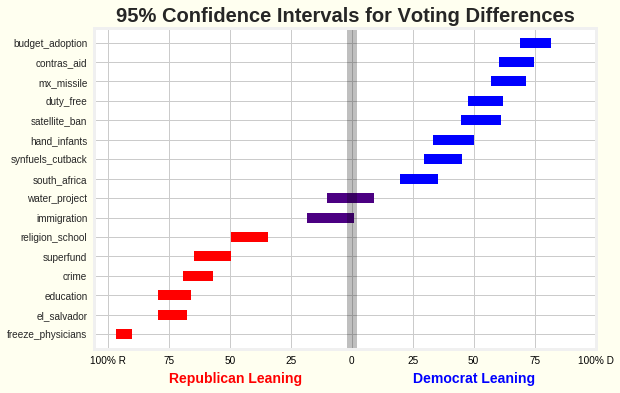

In [19]:
style.use("fivethirtyeight") 

fig, ax = plt.subplots()

y = [df_new2.index,df_new2.index]
x = [df_new2['6_LB_95CI'], df_new2['7_UB_95CI']]


plt.title('95% Confidence Intervals for Voting Differences', fontweight='bold')

fig.set_facecolor("ivory")

ax.set_facecolor("white")

y_ticks_ordered = ['freeze_physicians', 'el_salvador', 'education', 'crime',
                'superfund', 'religion_school', 'immigration', 'water_project',
                'south_africa', 'synfuels_cutback', 'hand_infants', 'satellite_ban',
                'duty_free',  'mx_missile', 'contras_aid', 'budget_adoption']  

barlist=ax.plot(x,y, linewidth=10, color='blue')
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('indigo')
barlist[7].set_color('indigo')

ax.tick_params(axis = y, labelrotation = 0, colors = 'black', size = 12)
ax.set_yticks(df_new2.index)
ax.set_yticklabels(y_ticks_ordered)

ax.set_xticks([-100,-75,-50,-25,0,25,50,75,100])
ax.set_xticklabels(['100% R','75','50','25','0','25','50','75','100% D'], color = 'black')

plt.axvline(x = 0, color = 'black', linewidth = 10, alpha = .25)
plt.text(x=-75,y=-2.5,s="Republican Leaning", color = 'red', weight = 'bold')
plt.text(x=25,y=-2.5,s="Democrat Leaning", color = 'blue', weight = 'bold')

plt.show()



## INTERPRETATION

A 95% confidence interval is the range in which one can feel confident that the population data resides based on the measurement of the sample data. In the graph above, one can see the various ranges ranked from most heavily Republican leaning voting differential to most heavily Democrat leaning voting differential. The varying widths depending on the issue demonstrate the varying degrees of certainty for these differentials.. For issues that are *significantly* more Republican leaning, the intervals are coded red and for issues that are *significantly* more Democrat leaning, the intervals are coded blue. For those issues that cross 0 (i.e. the differences are not statistically significant), the intervals are coded indigo. 

## STRETCH - DRUGS DATA

### Loading Data

In [20]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip #no url in quotes

--2018-12-05 15:14:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  11.4MB/s    in 4.5s    

2018-12-05 15:15:02 (9.10 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [21]:
!ls

drugsCom_raw.zip  sample_data


In [22]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [23]:
# df = pd.read_csv('drugsCom_raw.tsv', sep = '\t', header = 0)

df_drugs = pd.read_table('drugsComTrain_raw.tsv')
df_drugs.shape

(161297, 7)

In [24]:
df_drugs.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

### Data Cleanup

In [0]:
import datetime as dt

df_drugs.date = pd.to_datetime(df_drugs.date)

In [26]:
print(type(df_drugs.drugName[0]))
print(type(df_drugs.condition[0]))
print(type(df_drugs.review[0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [27]:
cols = ['drugName', 'condition', 'review', 'rating', 'date','usefulCount']

df_clean = df_drugs[cols]

df_clean.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [28]:
df_clean.dtypes

drugName               object
condition              object
review                 object
rating                float64
date           datetime64[ns]
usefulCount             int64
dtype: object

In [29]:
df_clean.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [30]:
df_clean.loc[df_clean.condition.isnull()].head()

,drugName,condition,review,rating,date,usefulCount
30,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,2010-08-18,1
148,Urea,NaN,"""Accurate information.""",10.0,2011-07-02,13
488,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,2010-10-20,25
733,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,2011-01-24,1
851,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,2017-03-23,1


### Investigation

In [31]:
drugs = df_clean.groupby('drugName')
condition = df_clean.groupby('condition')

condition_drug = df_clean.groupby(['condition','drugName'])

print (len(drugs.drugName.unique()))               #3436
print (len(condition.condition.unique()))          #884

print (len(condition_drug))                        #8748

3436
884
8748


In [32]:
# Getting rid of Ratings with observations <= 1

rating_mean = drugs.rating.mean()[drugs.rating.count() >= 2]
rating_std = drugs.rating.std()[drugs.rating.count() >= 2]
rating_count = drugs.rating.count()[drugs.rating.count() >= 2]
rating_sem = drugs.rating.sem()[drugs.rating.count() >= 2]

rating_se = rating_std / np.sqrt(rating_count)

rating_se.isnull().sum()



0

In [33]:
rating_se.head()

drugName
Abacavir / dolutegravir / lamivudine    0.345556
Abatacept                               0.784585
Abilify                                 0.160910
Abilify Discmelt                        0.000000
Abilify Maintena                        2.250000
Name: rating, dtype: float64

In [34]:
rating_sem.head() # Standard Error calculated the same as how I calculated it

drugName
Abacavir / dolutegravir / lamivudine    0.345556
Abatacept                               0.784585
Abilify                                 0.160910
Abilify Discmelt                        0.000000
Abilify Maintena                        2.250000
Name: rating, dtype: float64

In [0]:
rating_mean1 = drugs.rating.mean()
rating_sem1 = drugs.rating.sem()

In [36]:
ratings_lower_bound1 = rating_mean1 - 1.96 * rating_sem1
ratings_upper_bound1 = rating_mean1 + 1.96 * rating_sem1

# interval = stderr * stats.t.ppf((1 + 0.95) / 2., n - 1)
#   return (mean, mean - interval, mean + interval)


print(len(rating_mean1))
# print(len(rating_std))
# print(len(rating_count))
print(len(rating_sem1))
print(len(ratings_lower_bound1))
print(len(ratings_upper_bound1))



3436
3436
3436
3436


In [37]:
rating_stats1 = pd.concat([rating_mean1, ratings_lower_bound1], axis=1, ignore_index=True) #Merge alongside columns
rating_stats1 = pd.concat([rating_stats1, ratings_upper_bound1], axis=1, ignore_index=True)

# rating_stats.rename(index=str, columns={"0": "Mean", "1": "Lower_Bound", "2":"Upper_Bound"}, inplace = True)

rating_stats1.columns = ["Mean", "Lower_Bound_95%CI", "Upper_Bound_95%CI"]

rating_stats1.reset_index(inplace=True)

rating_stats1.head()

,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
0,A + D Cracked Skin Relief,10.000000,NaN,NaN
1,A / B Otic,10.000000,NaN,NaN
2,Abacavir / dolutegravir / lamivudine,8.211538,7.534248,8.888829
3,Abacavir / lamivudine / zidovudine,9.000000,NaN,NaN
4,Abatacept,7.157895,5.620108,8.695682


**While one is able to get a computed answer for the upper and lower bound for observations, the result is NaN as one is unable to run statistics on a single rating point. One will run this code again for ratings in which there are at least 3 observations (2 observations results in the lower bound = upper bound) **

In [38]:
rating_count = df_clean.groupby(['drugName'])['rating'].count()

rating_count3 = rating_count[rating_count >= 3]

len(rating_count3)

2231

In [39]:
# Getting rid of Ratings with observations <= 2

rating_mean = drugs.rating.mean()[drugs.rating.count() >= 3]
rating_std = drugs.rating.std()[drugs.rating.count() >= 3]
rating_count = drugs.rating.count()[drugs.rating.count() >= 3]
rating_sem = drugs.rating.sem()[drugs.rating.count() >= 3]

rating_se = rating_std / np.sqrt(rating_count)

rating_se.isnull().sum()



0

In [40]:
ratings_lower_bound = rating_mean - 1.96 * rating_sem
ratings_upper_bound = rating_mean + 1.96 * rating_sem

# interval = stderr * stats.t.ppf((1 + 0.95) / 2., n - 1)
#   return (mean, mean - interval, mean + interval)


print(len(rating_mean))
print(len(rating_sem))
print(len(ratings_lower_bound))
print(len(ratings_upper_bound))



2231
2231
2231
2231


In [50]:
rating_stats = pd.concat([rating_mean, ratings_lower_bound], axis=1, ignore_index=True) #Merge alongside columns
rating_stats = pd.concat([rating_stats, ratings_upper_bound], axis=1, ignore_index=True)

# rating_stats.rename(index=str, columns={"0": "Mean", "1": "Lower_Bound", "2":"Upper_Bound"}, inplace = True)

rating_stats.columns = ["Mean", "Lower_Bound_95%CI", "Upper_Bound_95%CI"]

rating_stats.reset_index(inplace=True)

rating_stats.head()

,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
0,Abacavir / dolutegravir / lamivudine,8.211538,7.534248,8.888829
1,Abatacept,7.157895,5.620108,8.695682
2,Abilify,6.540359,6.224976,6.855742
3,Abilify Maintena,7.750000,3.340000,12.160000
4,Abiraterone,9.111111,7.827330,10.394892


In [55]:
rating_stats = rating_stats[(rating_stats['Upper_Bound_95%CI'] - rating_stats['Lower_Bound_95%CI']) > 0]

print(len(rating_stats))

rating_stats.head()

2182


,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
0,Abacavir / dolutegravir / lamivudine,8.211538,7.534248,8.888829
1,Abatacept,7.157895,5.620108,8.695682
2,Abilify,6.540359,6.224976,6.855742
3,Abilify Maintena,7.750000,3.340000,12.160000
4,Abiraterone,9.111111,7.827330,10.394892


**Rather than investigate all of the drugs, I picked the top ten and bottom ten drugs based on rating.**

In [70]:
top_ten = rating_stats.sort_values(by='Mean', ascending = True).head(10)
bottom_ten = rating_stats.sort_values(by='Mean', ascending = True).tail(10)
top_ten

,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
1630,ProAir RespiClick,1.193548,1.025474,1.361623
316,Brompheniramine / dextromethorphan / phenyleph...,1.250000,0.760000,1.740000
1331,Monistat 1-Day or Night Combination Pack,1.416667,1.038394,1.794939
1107,Lamisil AT,1.500000,0.520000,2.480000
976,Hydroquinone,1.750000,0.811721,2.688279
91,Allegra Allergy,1.800000,0.232000,3.368000
2055,Umeclidinium,2.000000,0.868393,3.131607
1902,Systane,2.125000,-0.080000,4.330000
804,Factive,2.250000,-0.200000,4.700000
728,Enskyce,2.250000,-0.200000,4.700000


In [71]:
bottom_ten

,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
214,Avonex Pen,9.833333,9.506667,10.160000
249,Belladonna / opium,9.833333,9.506667,10.160000
1624,Primatene Mist,9.833333,9.506667,10.160000
281,Biafine,9.857143,9.577143,10.137143
1425,Niravam,9.857143,9.577143,10.137143
153,Aprepitant,9.900000,9.704000,10.096000
714,Emend,9.900000,9.704000,10.096000
588,Dexbrompheniramine / pseudoephedrine,9.947368,9.875417,10.019320
659,Drixoral Cold and Allergy,9.948718,9.878586,10.018850
1813,Silver sulfadiazine,9.972222,9.917778,10.026667


In [72]:
plot_df = pd.concat([top_ten, bottom_ten]).reset_index()

plot_df

,index,drugName,Mean,Lower_Bound_95%CI,Upper_Bound_95%CI
0,1630,ProAir RespiClick,1.193548,1.025474,1.361623
1,316,Brompheniramine / dextromethorphan / phenyleph...,1.250000,0.760000,1.740000
2,1331,Monistat 1-Day or Night Combination Pack,1.416667,1.038394,1.794939
3,1107,Lamisil AT,1.500000,0.520000,2.480000
4,976,Hydroquinone,1.750000,0.811721,2.688279
5,91,Allegra Allergy,1.800000,0.232000,3.368000
6,2055,Umeclidinium,2.000000,0.868393,3.131607
7,1902,Systane,2.125000,-0.080000,4.330000
8,804,Factive,2.250000,-0.200000,4.700000
9,728,Enskyce,2.250000,-0.200000,4.700000


In [73]:
y_ticks_ordered = plot_df.drugName.tolist()

y_ticks_ordered

['ProAir RespiClick',
 'Brompheniramine / dextromethorphan / phenylephrine',
 'Monistat 1-Day or Night Combination Pack',
 'Lamisil AT',
 'Hydroquinone',
 'Allegra Allergy',
 'Umeclidinium',
 'Systane',
 'Factive',
 'Enskyce',
 'Avonex Pen',
 'Belladonna / opium',
 'Primatene Mist',
 'Biafine',
 'Niravam',
 'Aprepitant',
 'Emend',
 'Dexbrompheniramine / pseudoephedrine',
 'Drixoral Cold and Allergy',
 'Silver sulfadiazine']

### Plot

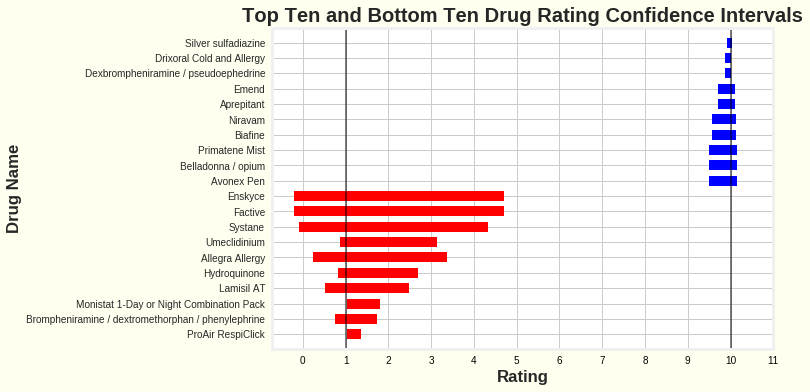

In [76]:
style.use("fivethirtyeight") 

fig, ax = plt.subplots()

y = [plot_df.index, plot_df.index]
x = [plot_df['Lower_Bound_95%CI'],plot_df['Upper_Bound_95%CI']]


plt.title('Top Ten and Bottom Ten Drug Rating Confidence Intervals', fontweight='bold')

fig.set_facecolor("ivory")

ax.set_facecolor("white")

# y_ticks_ordered = ['freeze_physicians', 'el_salvador', 'education', 'crime',
#                 'superfund', 'religion_school', 'immigration', 'water_project',
#                 'south_africa', 'synfuels_cutback', 'hand_infants', 'satellite_ban',
#                 'duty_free',  'mx_missile', 'contras_aid', 'budget_adoption']  

barlist=ax.plot(x,y, linewidth=10, color='blue')
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')


# barlist[5].set_color('r')
# barlist[6].set_color('indigo')
# barlist[7].set_color('indigo')

ax.tick_params(axis = y, labelrotation = 0, colors = 'black', size = 12)
ax.set_yticks(plot_df.index)
ax.set_yticklabels(y_ticks_ordered)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11'], color = 'black')

plt.axvline(x = 1, color = 'black', linewidth = 2, alpha = .5)
plt.axvline(x = 10, color = 'black', linewidth = 2, alpha = .5)

# plt.text(x=-75,y=-2.5,s="Republican Leaning", color = 'red', weight = 'bold')
# plt.text(x=25,y=-2.5,s="Democrat Leaning", color = 'blue', weight = 'bold')

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Drug Name', fontweight='bold') 

plt.show()

### Interpretation

I chose the top ten and bottom ten drugs by rating to illustrate a point about confidence intervals. Normally, the rating system is from 1-10 and as one can see, the mean ratings for each of the drugs fits within the range. So why does one see confidence intervals that extend beyond the boundaries? The reason is the standard error for drug ratings with fewer counts is larger. When that is the case, the width of the 95% confidence interval, which is a function of the standard error, gets larger. It can get large even to the point where the bounds extend beyond the logic of the scoring system. In general, it is important to not consider confidence intervals in a vacuum and to tether it to the logic of the data.